In [32]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

def load_tuning_reports(folder_path):
    """
    Load tuning CSVs:
      - '*_cv.csv' → cv_dfs[num]
      - '*_test.csv' → test_dfs[num]
    Also assigns globals df{num}_1 and df{num}_2 for convenience.
    
    Returns:
      cv_dfs: dict of tuning_num → cv DataFrame
      test_dfs: dict of tuning_num → test DataFrame
    """
    csv_paths = sorted(glob.glob(os.path.join(folder_path, '*.csv')))
    cv_dfs = {}
    test_dfs = {}
    
    for path in csv_paths:
        basename = os.path.basename(path)
        name, _ = os.path.splitext(basename)
        parts = name.split('_')
        if len(parts) < 5:
            continue
        
        tuning_num = parts[1]
        file_type = parts[-1].lower()
        
        df = pd.read_csv(path)
        if file_type == 'cv':
            cv_dfs[tuning_num] = df
            globals()[f"df{tuning_num}_1"] = df
        elif file_type == 'test':
            test_dfs[tuning_num] = df
            globals()[f"df{tuning_num}_2"] = df
    
    return cv_dfs, test_dfs

def plot_cv_metrics(cv_dfs, tuning_num, metrics=None, epoch_range=(1, 10), save_dir=None):
    """
    Plot CV metrics by fold for a specific tuning number.
    Optionally save each figure to save_dir.
    
    Parameters:
      cv_dfs: dict of tuning_num → cv DataFrame
      tuning_num: str or int key into cv_dfs
      metrics: list of metric column names to plot
      epoch_range: tuple (min_epoch, max_epoch) inclusive
      save_dir: str path to directory where figures will be saved (None to skip saving)
    """
    df = cv_dfs.get(str(tuning_num))
    if df is None:
        raise ValueError(f"No CV data for tuning {tuning_num}")
    
    if metrics is None:
        metrics = ['val_acc', 'val_prec', 'val_recall', 'val_f1']
    
    df_plot = df[df['epoch'].between(epoch_range[0], epoch_range[1])]
    
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    for metric in metrics:
        plt.figure()
        for fold in sorted(df_plot['fold'].unique()):
            sub = df_plot[df_plot['fold'] == fold]
            plt.plot(sub['epoch'], sub[metric], label=f'Fold {fold}')
        
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f"Tuning {tuning_num} | {metric} by Fold (Epoch {epoch_range[0]}–{epoch_range[1]})")
        plt.legend()

        ax = plt.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylim(0, 1)
        
        if save_dir:
            filepath = os.path.join(save_dir, f"tuning_{tuning_num}_{metric}.png")
            plt.savefig(filepath, bbox_inches='tight')
            print(f"Saved CV plot: {filepath}")
        
        plt.show()

def plot_test_metrics(test_dfs, metrics=None, save_dir=None):
    """
    Plot Test metrics by fold for each tuning, using an existing test_dfs dict.

    Parameters:
      test_dfs (dict): tuning_num → DataFrame with 'fold' and test_* columns
      metrics (list): list of metric column names to plot. 
                      Default: detect all columns starting with 'test_'
      save_dir (str): directory path to save figures (None to skip saving)
    """
    # Auto-detect metrics if not provided
    if metrics is None:
        sample_df = next(iter(test_dfs.values()))
        metrics = [col for col in sample_df.columns if col.startswith('test_')]
    
    # Prepare save directory
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    # Plot each metric
    for metric in metrics:
        plt.figure()
        for tuning_num, df in test_dfs.items():
            plt.plot(df['fold'], df[metric], marker='o', label=f'Tuning {tuning_num}')
        plt.xlabel('Fold')
        plt.ylabel(metric)
        plt.title(f"{metric} by Fold")
        plt.legend()

        ax = plt.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylim(0, 1)
        
        # Save if requested
        if save_dir:
            filepath = os.path.join(save_dir, f"{metric}_by_fold.png")
            plt.savefig(filepath, bbox_inches='tight')
            print(f"Saved: {filepath}")
        
        plt.show()

# Example usage:
# folder = 'tuning_reports'
# cv_data, test_data = load_tuning_reports(folder)
# plot_cv_metrics(cv_data, tuning_num='2', save_dir='plots/cv')
# plot_test_metrics(test_dfs, save_dir='plots/test')

Saved CV plot: plots/cv/tuning_2_val_acc.png


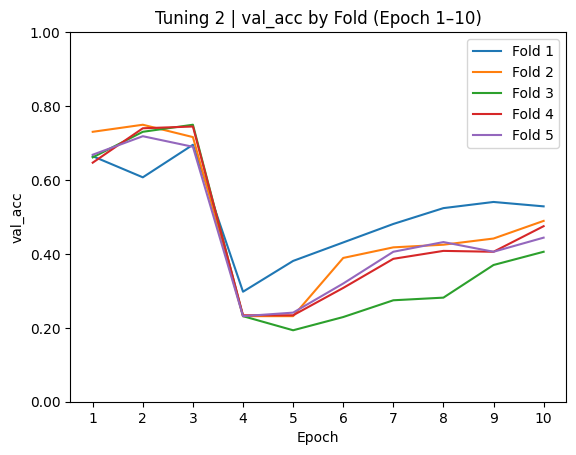

Saved CV plot: plots/cv/tuning_2_val_prec.png


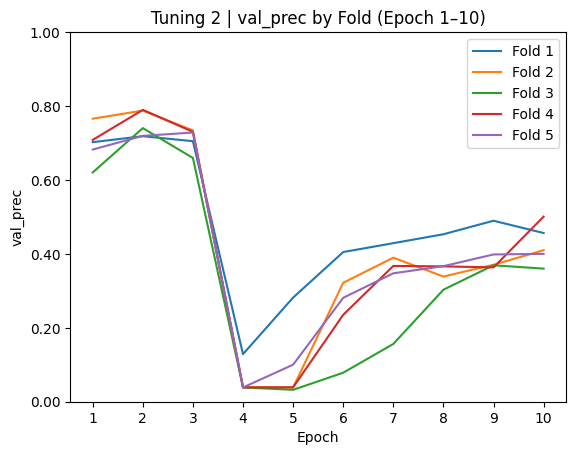

Saved CV plot: plots/cv/tuning_2_val_recall.png


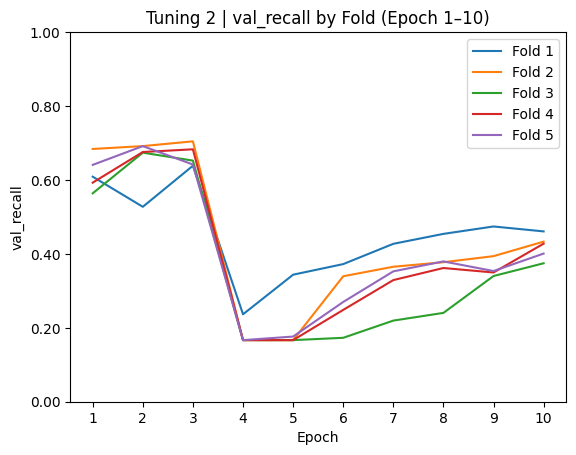

Saved CV plot: plots/cv/tuning_2_val_f1.png


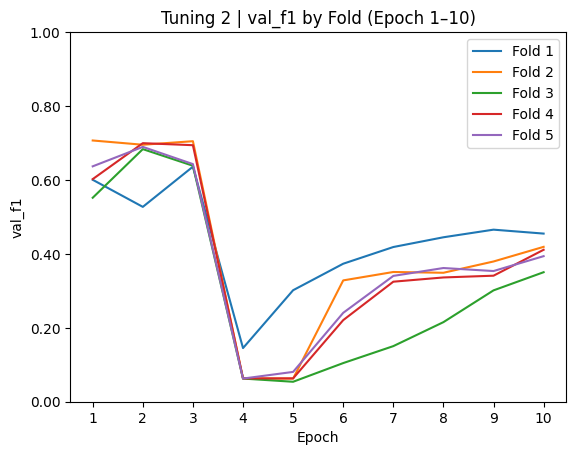

Saved CV plot: plots/cv/tuning_3_val_acc.png


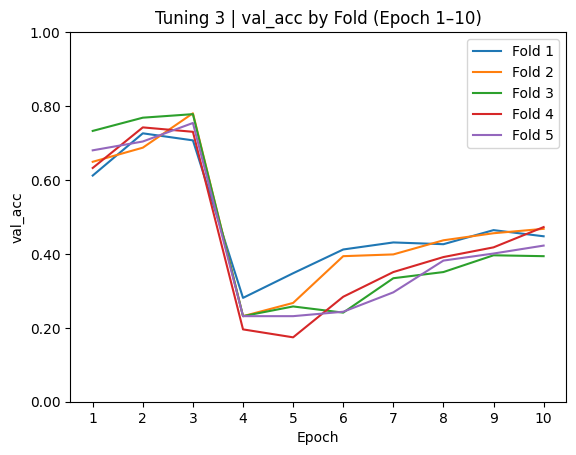

Saved CV plot: plots/cv/tuning_3_val_prec.png


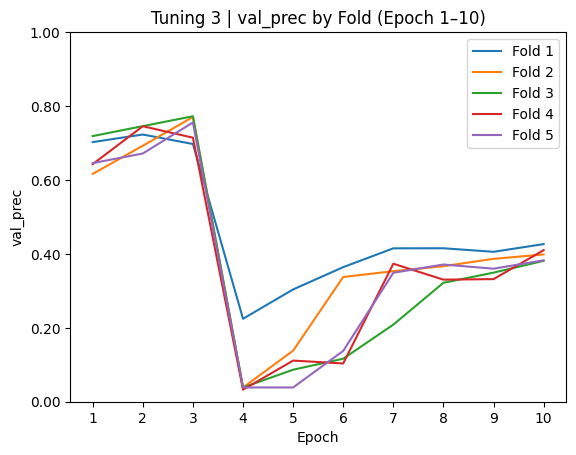

Saved CV plot: plots/cv/tuning_3_val_recall.png


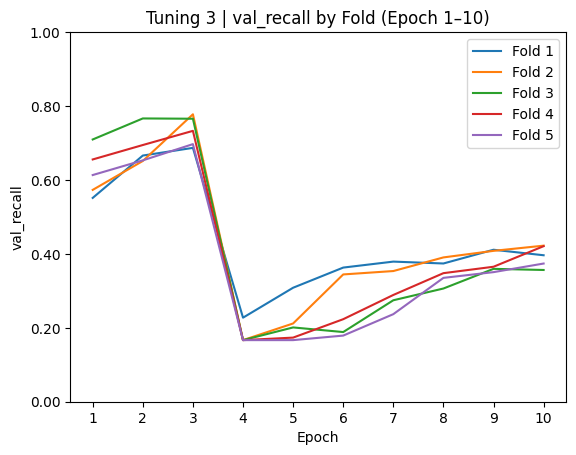

Saved CV plot: plots/cv/tuning_3_val_f1.png


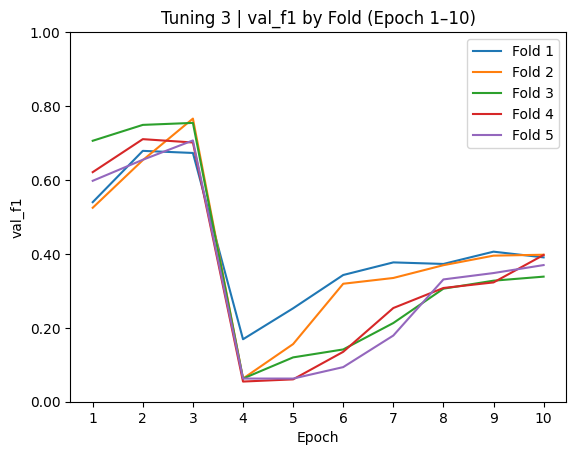

Saved CV plot: plots/cv/tuning_4_val_acc.png


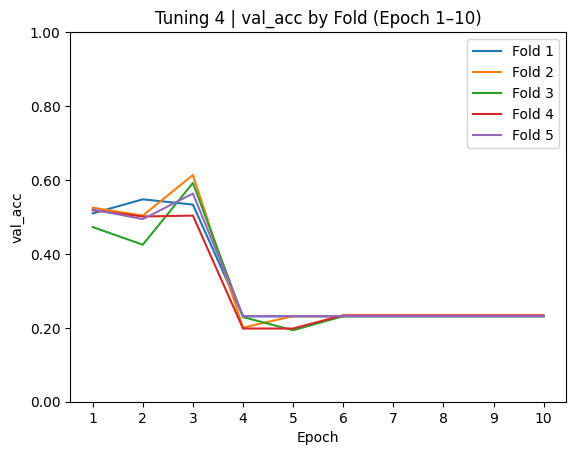

Saved CV plot: plots/cv/tuning_4_val_prec.png


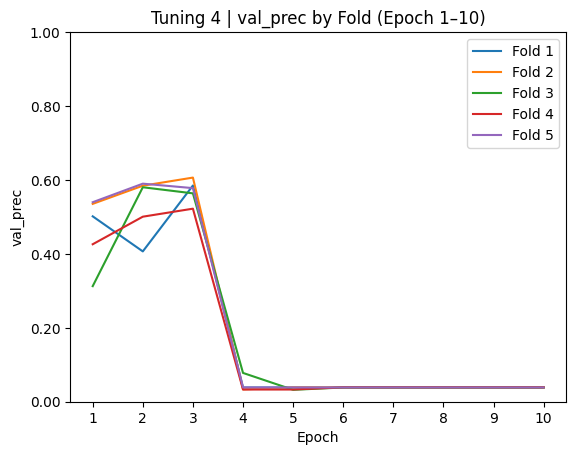

Saved CV plot: plots/cv/tuning_4_val_recall.png


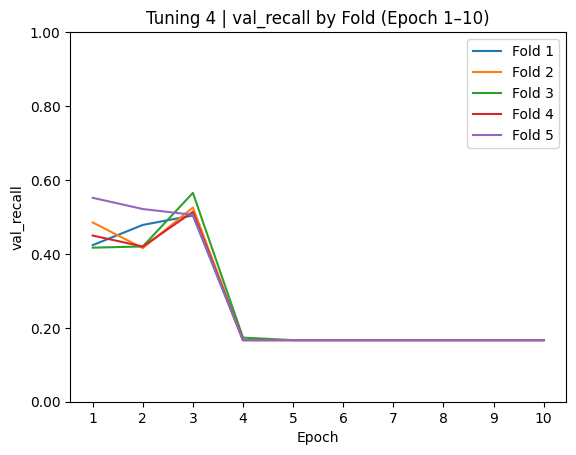

Saved CV plot: plots/cv/tuning_4_val_f1.png


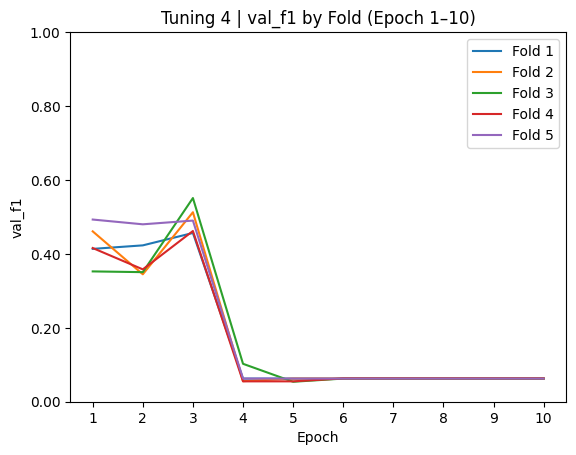

Saved CV plot: plots/cv/tuning_5_val_acc.png


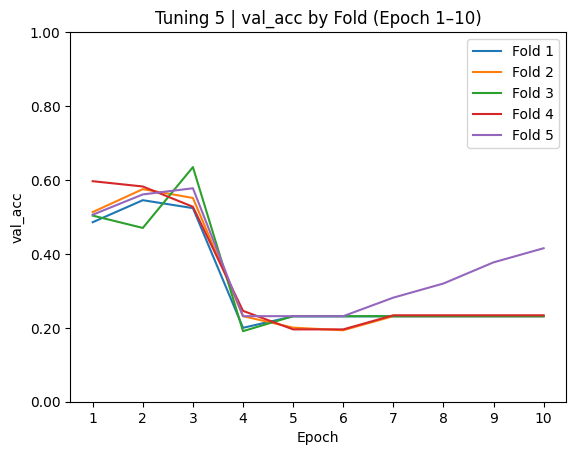

Saved CV plot: plots/cv/tuning_5_val_prec.png


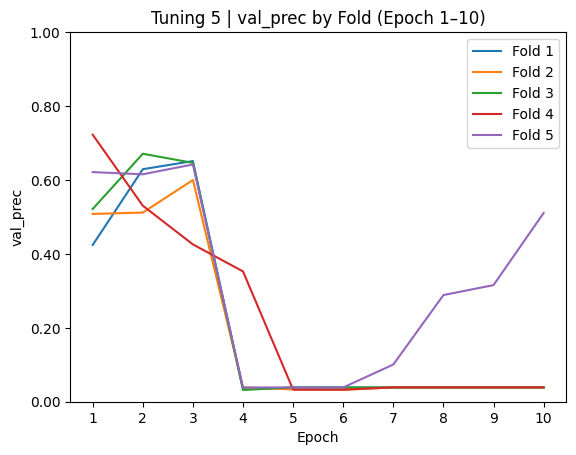

Saved CV plot: plots/cv/tuning_5_val_recall.png


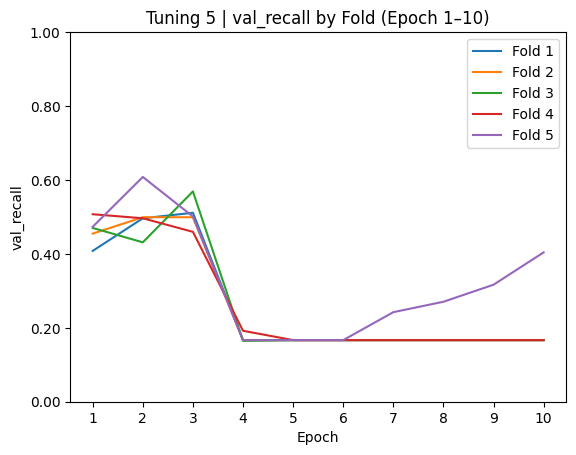

Saved CV plot: plots/cv/tuning_5_val_f1.png


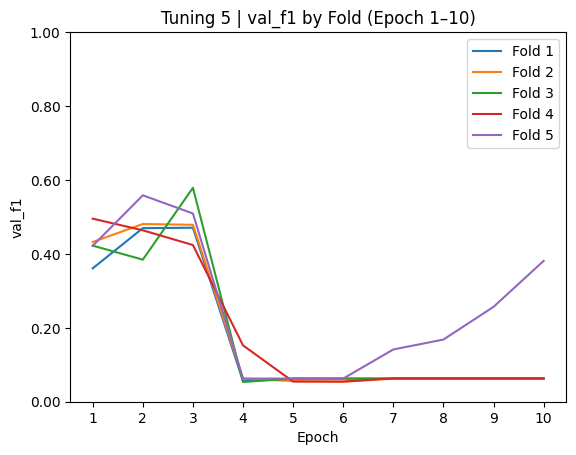

Saved: plots/test/test_acc_by_fold.png


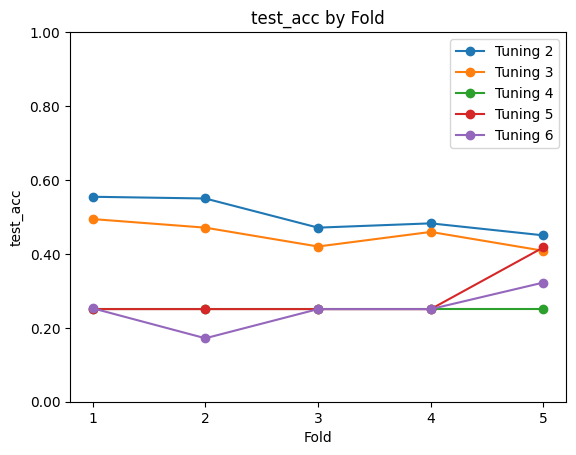

Saved: plots/test/test_prec_by_fold.png


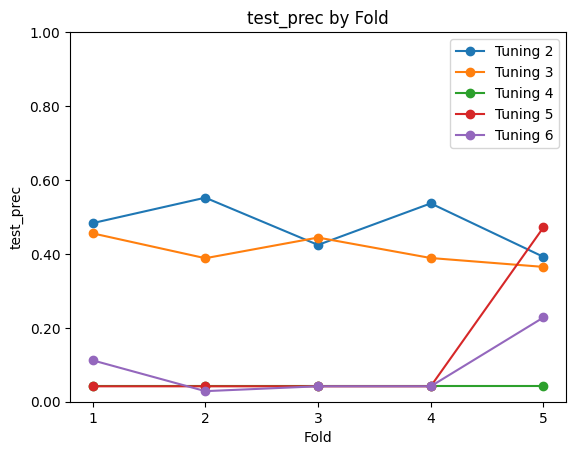

Saved: plots/test/test_recall_by_fold.png


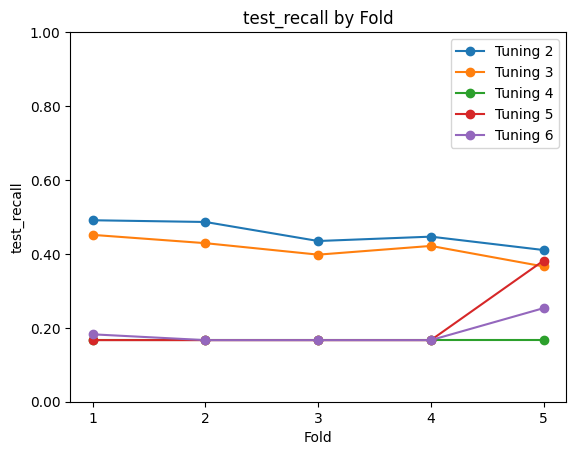

Saved: plots/test/test_f1_by_fold.png


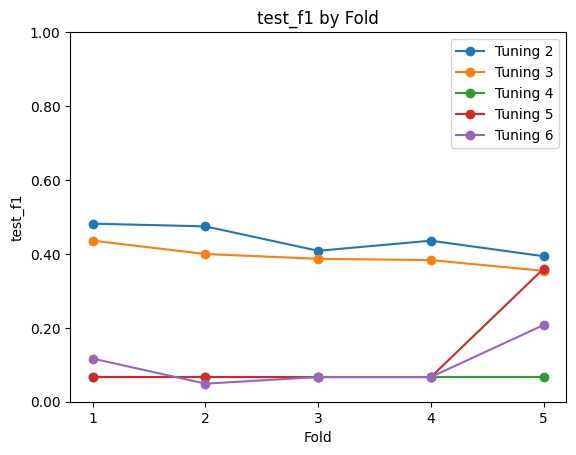

In [34]:
folder = 'tuning_reports'
cv_data, test_data = load_tuning_reports(folder)

# CV 플롯 저장
for i in range(2,6):
    plot_cv_metrics(cv_data, tuning_num=i, save_dir='plots/cv')

# Test 플롯 저장
plot_test_metrics(test_data, save_dir='plots/test')